In [1]:
import numpy as np
from cuckoo_alg import Cuckoo
from cuckoo_impr_alg import Cuckoo_Improved
from bat_alg import BatAlgorithm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Cuckoo Algorithm

Основна ідея:
Алгоритм моделює поведінку зозуль, які відкладають свої яйця у гнізда інших птахів, щоб їхні яйця виросли без зусиль.  
При цьому:  
  
хороші (якісні рішення) мають більші шанси на «виживання»,  
  
погані рішення виявляються і замінюються новими кращими.  
  
Алгоритм працює через такі кроки:  
Ініціалізує популяцію гнізд (рішень) випадково.  

У кожній ітерації:

1. Випадкова зозуля генерує нове рішення навколо існуючого (трохи мутує його).

2. Якщо нове рішення краще за поточне у гнізді, то воно замінює старе.

3. З певною імовірністю (p_detect) найгірше гнізда знищується і перегенеровується випадково.

Зберігається найкраще рішення за всі ітерації.

Процес триває, поки не досягнемо максимальної кількості ітерацій або потрібної точності.

## Cucko Improved Algorithm

**Основні ідеї покращеного алгоритму:**

1. **Адаптивне масове оновлення:**
    - Кількість гнізд, які оновлюються на кожній ітерації, змінюється в залежності від поточної ітерації.
    - Це дозволяє спочатку активно досліджувати простір рішень, а потім поступово зменшувати інтенсивність оновлення.
    - Формула для адаптивної масової зміни:
      $
      \text{adaptive\_mass\_update} = \text{mass\_update\_fraction} \times \left(1 - \frac{n}{\text{max\_iter}}\right)
      $
    - На початкових етапах (висока швидкість дослідження) оновлюється більше гнізд, а на пізніх етапах — менше.

2. **Локальний пошук навколо найкращого гнізда:**
    - Виконується м'яке оновлення (локальна мутація) навколо найкращого знайденого гнізда.
    - Локальна мутація допомагає зменшити ймовірність потрапляння в локальний мінімум.
    - Формула для локальної мутації:
      $
      \text{new\_best\_candidate} = \text{best\_nest} + 0.1 \times \text{range\_width} \times \text{uniform}(-1, 1)
      $

# Bat Algorithm

**Основні ідеї алгоритму:**

1. **Ініціалізація:**
    - Початкові позиції генеруються випадково в межах заданих кордонів:
      $
      \text{positions} = \text{uniform}(\text{bounds}[:, 0], \text{bounds}[:, 1])
      $
    - Швидкості всіх кажанів ініціалізуються нулями:
      $
      \text{velocities} = 0
      $
    - Початкові значення гучності та пульсації також генеруються випадково:
      $
      \text{loudness} = \text{uniform}(1, 2), \quad \text{pulse rate} = \text{uniform}(0, 1)
      $

2. **Оновлення позиції:**
    - Кожен кажан оновлює частоту на основі випадкової величини $\beta$:
      $
      \text{frequency}_i = f_{\text{min}} + (f_{\text{max}} - f_{\text{min}}) \times \beta
      $
    - Оновлення швидкості:
      $
      \text{velocity}_i = \text{velocity}_i + (position_i - best\_position) \times \text{frequency}_i
      $
    - Оновлення позиції:
      $
      \text{new\_position} = \text{position}_i + \text{velocity}_i
      $
    - Гарантуємо, що нова позиція не виходить за межі:
      $
      \text{new\_position} = \text{clip}(\text{new\_position}, \text{bounds}[:, 0], \text{bounds}[:, 1])
      $

3. **Локальний пошук:**
    - З ймовірністю $1 - \text{pulse rate}_i$ кажан виконує локальний пошук поблизу найкращого рішення:
      $
      \text{new\_position} = \text{best\_position} + 0.001 \times \text{randn(dim)}
      $

4. **Умови прийняття нового розв'язку:**
    - Нове положення приймається, якщо:
      - Воно краще за поточне.
      - Гучність більша за випадкове число:
        $
        \text{if } \text{rand()} < \text{loudness}_i
        $
    - Якщо нове положення приймається:
      - Зменшуємо гучність:
        $
        \text{loudness}_i = \alpha \times \text{loudness}_i
        $
      - Збільшуємо пульсацію:
        $
        \text{pulse rate}_i = \text{pulse rate}_i \times (1 - \exp(-\gamma))
        $

5. **Оновлення найкращого рішення:**
    - Якщо нова позиція краща за глобальне найкраще рішення, оновлюємо:
      $
      \text{best\_position} = \text{new\_position}
      $

In [ ]:
# помилка в методичці
# mishra_berda([-3.1302468, -1.5821422])
# (-3.1302468 + 5)**2 + (-1.5821422 - 5)**2 
# def mishra_bird(x, y):
#     term1 = np.exp((1 - np.cos(x))**2) * np.sin(y)
#     term2 = np.exp((1 - np.sin(y))**2) * np.cos(x)
#     term3 = (x - y)**2
#     return term1 + term2 + term3

# # Define the search area and constraints
# x_min, x_max = -10, 0
# y_min, y_max = -6.5, 0

# x = np.linspace(x_min, x_max, 1000)
# y = np.linspace(y_min, y_max, 1000)
# X, Y = np.meshgrid(x, y)

# constraint = ((X + 5)**2 + (Y + 5)**2 < 25)

# # Calculate the function values with the constraint applied
# Z = np.where(constraint, mishra_bird(X, Y), np.nan)

# # Plotting the surface plot
# plt.figure(figsize=(8, 6))
# contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
# plt.colorbar(contour, label='f(x, y)')
# plt.title("Mishra-Bird Function (3 function)")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()

In [2]:
# === Тестові функції ===
def rastrigin(X):
    A = 10
    return A * len(X) + np.sum(X**2 - A * np.cos(2 * np.pi * X))
bounds_rastrigin = [(-5.12, 5.12)] * 20

def mishra_berda(X):
    x, y = X
    if (x + 5)**2 + (y + 5)**2 >= 25:
        return np.finfo(float).max
    return np.exp((1 - np.cos(x))**2) * np.sin(y) + np.exp((1 - np.sin(y))**2) * np.cos(x) + (x - y)**2
bounds_mishra = [(-10, 0), (-6.5, 0)]

# Графіки для функції Растрігіна

In [28]:
cs_rastrigin = Cuckoo(rastrigin, bounds_rastrigin, n_nests=250, max_iter=10000, delta_max=0.9, delta_min=0.1)
cs_improved_rastrigin = Cuckoo_Improved(rastrigin, bounds_rastrigin, n_nests=250, max_iter=10000, delta_max=0.9, delta_min=0.1, mass_update_fraction=0.1)

best_position1, best_value1, history1, all_history1 = cs_rastrigin.optimize()
best_position2, best_value2, history2, all_history2 = cs_improved_rastrigin.optimize()
print("\n=== Оптимізація функції Растрінга ===")
print("Для методу Cucko")
print(f"Найкраще рішення: {best_position1}")
print(f"Значення функції: {best_value1}")
print("Для методу Cucko Improved")
print(f"Найкраще рішення: {best_position2}")
print(f"Значення функції: {best_value2}")


Cucko Algorithm: Iteration 100, Best fitness = 221.61005429916025
Cucko Algorithm: Iteration 200, Best fitness = 221.61005429916025
Cucko Algorithm: Iteration 300, Best fitness = 221.61005429916025
Cucko Algorithm: Iteration 400, Best fitness = 221.61005429916025
Cucko Algorithm: Iteration 500, Best fitness = 221.61005429916025
Cucko Algorithm: Iteration 600, Best fitness = 221.61005429916025
Cucko Algorithm: Iteration 700, Best fitness = 221.61005429916025
Cucko Algorithm: Iteration 800, Best fitness = 221.61005429916025
Cucko Algorithm: Iteration 900, Best fitness = 221.61005429916025
Cucko Algorithm: Iteration 1000, Best fitness = 221.61005429916025
Cucko Algorithm: Iteration 1100, Best fitness = 221.61005429916025
Cucko Algorithm: Iteration 1200, Best fitness = 221.61005429916025
Cucko Algorithm: Iteration 1300, Best fitness = 221.61005429916025
Cucko Algorithm: Iteration 1400, Best fitness = 221.61005429916025
Cucko Algorithm: Iteration 1500, Best fitness = 221.61005429916025
Cuck

In [29]:
bat_rastrigin = BatAlgorithm(rastrigin, bounds_rastrigin, num_bats=100, max_iter=10000, alpha=0.5, gamma=0.5, f_min=0.0, f_max=2.0)
best_position3, best_value3, history3, all_history3 = bat_rastrigin.optimize()

print("\n=== Оптимізація функції Растрінга ===")
print("Для методу BatAlgorithm")
print(f"Найкраще рішення: {best_position3}")
print(f"Значення функції: {best_value3}")


Iteration 100: Best fitness = 31.840297985052075
Iteration 200: Best fitness = 31.839929354472844
Iteration 300: Best fitness = 31.83991971137138
Iteration 400: Best fitness = 31.839731410554236
Iteration 500: Best fitness = 31.839334588842746
Iteration 600: Best fitness = 31.839334588842746
Iteration 700: Best fitness = 31.839334588842746
Iteration 800: Best fitness = 31.839334588842746
Iteration 900: Best fitness = 31.839334588842746
Iteration 1000: Best fitness = 31.839334588842746
Iteration 1100: Best fitness = 31.839334588842746
Iteration 1200: Best fitness = 31.839315469588826
Iteration 1300: Best fitness = 31.839315469588826
Iteration 1400: Best fitness = 31.839315469588826
Iteration 1500: Best fitness = 31.839315469588826
Iteration 1600: Best fitness = 31.839315469588826
Iteration 1700: Best fitness = 31.839315469588826
Iteration 1800: Best fitness = 31.839315469588826
Iteration 1900: Best fitness = 31.839315469588826
Iteration 2000: Best fitness = 31.839315469588826
Iteration 

In [25]:
def plot_convergence(histories, labels, title="Графік збіжності алгоритмів"):
    plt.figure(figsize=(10, 6))

    for history, label in zip(histories, labels):
        # Витягуємо значення найкращого рішення на кожній ітерації
        best_values = [item[1] for item in history]
        plt.plot(best_values, label=label, linewidth=2)

    plt.title(title)
    plt.xlabel("Ітерація")
    plt.ylabel("Найкраще значення цільової функції")
    # plt.yscale("log") 
    plt.legend()
    plt.grid(True)
    plt.show()


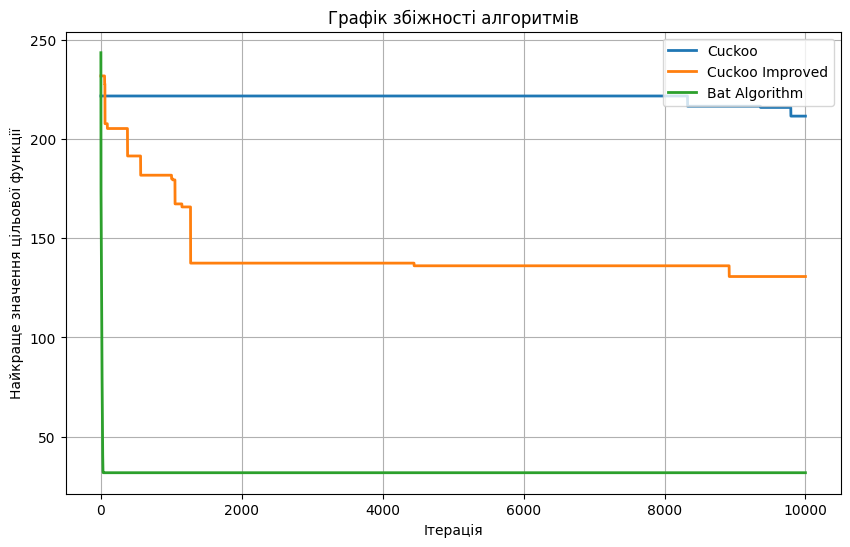

In [33]:
plot_convergence([history1, history2, history3], ["Cuckoo", "Cuckoo Improved", "Bat Algorithm"])

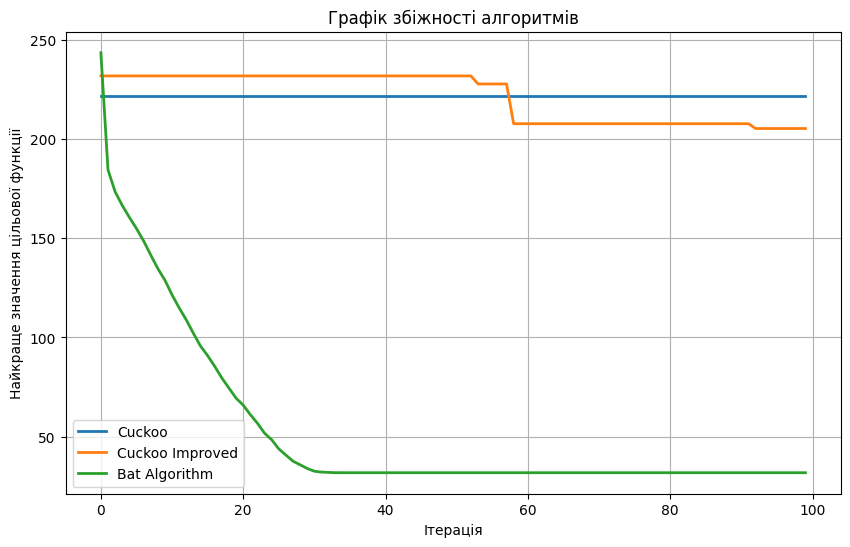

In [32]:
plot_convergence([history1[:100], history2[:100], history3[:100]], ["Cuckoo", "Cuckoo Improved", "Bat Algorithm"])

# Графіки для функції Мішри-Берда

In [24]:
def plot_distance_to_optimum(histories, labels, title="Distance to Optimum", optimum=0):
    plt.figure(figsize=(10, 6))

    for history, label in zip(histories, labels):
    
        best_values = [item[1] for item in history]
        
        errors = [abs(val - optimum) for val in best_values]
        plt.plot(errors, label=label, linewidth=2)

    plt.title(title)
    plt.xlabel("Ітерація")
    plt.ylabel("Абсолютна похибка до нуля")
    plt.yscale("log")  
    plt.legend()
    plt.grid(True)
    plt.show()

In [65]:
cs_mishra = Cuckoo(mishra_berda, bounds_mishra, n_nests=100, max_iter=1000, delta_max=0.9, delta_min=0.3, target=-106.7645367)
best_position1_mishra, best_value1_mishra, history1_mishra, all_history1_mishra = cs_mishra.optimize()
cs_improved_mishra = Cuckoo_Improved(mishra_berda, bounds_mishra, n_nests=100, max_iter=1000, delta_max=0.9, delta_min=0.3, mass_update_fraction=0.1, target=-106.7645367)
best_position2_mishra, best_value2_mishra, history2_mishra, all_history2_mishra = cs_improved_mishra.optimize()
print("\n=== Оптимізація функції Мішри-Берда ===")
print("Для методу Cucko")
print(f"Найкраще рішення: {best_position1_mishra}")
print(f"Значення функції: {best_value1_mishra}")
print("Для методу Cucko Improved")
print(f"Найкраще рішення: {best_position2_mishra}")
print(f"Значення функції: {best_value2_mishra}")

Cucko Algorithm: Iteration 100, Best fitness = -105.7568968915564
Cucko Algorithm: Iteration 200, Best fitness = -105.7568968915564
Cucko Algorithm: Iteration 300, Best fitness = -105.7568968915564
Cucko Algorithm: Iteration 400, Best fitness = -105.7568968915564
Cucko Algorithm: Iteration 500, Best fitness = -105.7568968915564
Cucko Algorithm: Iteration 600, Best fitness = -105.7568968915564
Cucko Algorithm: Iteration 700, Best fitness = -105.7568968915564
Cucko Algorithm: Iteration 800, Best fitness = -105.7568968915564
Cucko Algorithm: Iteration 900, Best fitness = -105.7568968915564
Cucko Algorithm: Iteration 1000, Best fitness = -105.7568968915564
Cucko Improved Algorithm: Iteration 100, Best fitness = -106.32481679283553
Cucko Improved Algorithm: Iteration 200, Best fitness = -106.32481679283553
Cucko Improved Algorithm: Iteration 300, Best fitness = -106.32481679283553
Cucko Improved Algorithm: Iteration 400, Best fitness = -106.68101398077127
Cucko Improved Algorithm: Iteration

In [66]:
bat_mishra = BatAlgorithm(mishra_berda, bounds_mishra, num_bats=50, max_iter=1000, alpha=0.9, gamma=0.9, f_min=0.0, f_max=2.0, target=-106.7645367)
best_position3_mishra, best_value3_mishra, history3_mishra, all_history3_mishra = bat_mishra.optimize()
print("\n=== Оптимізація функції Мішри-Берда ===")
print("Для методу BatAlgorithm")
print(f"Найкраще рішення: {best_position3_mishra}")
print(f"Значення функції: {best_value3_mishra}")

Target reached at iteration 18: Best fitness = -106.76453671836364

=== Оптимізація функції Мішри-Берда ===
Для методу BatAlgorithm
Найкраще рішення: [-3.13026175 -1.58214349]
Значення функції: -106.76453671836364


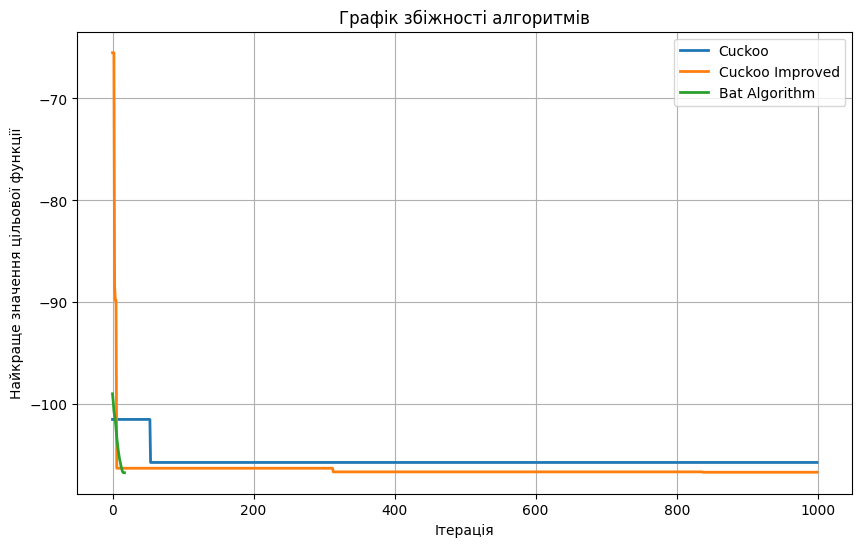

In [67]:
plot_convergence([history1_mishra, history2_mishra, history3_mishra], ["Cuckoo", "Cuckoo Improved", "Bat Algorithm"])

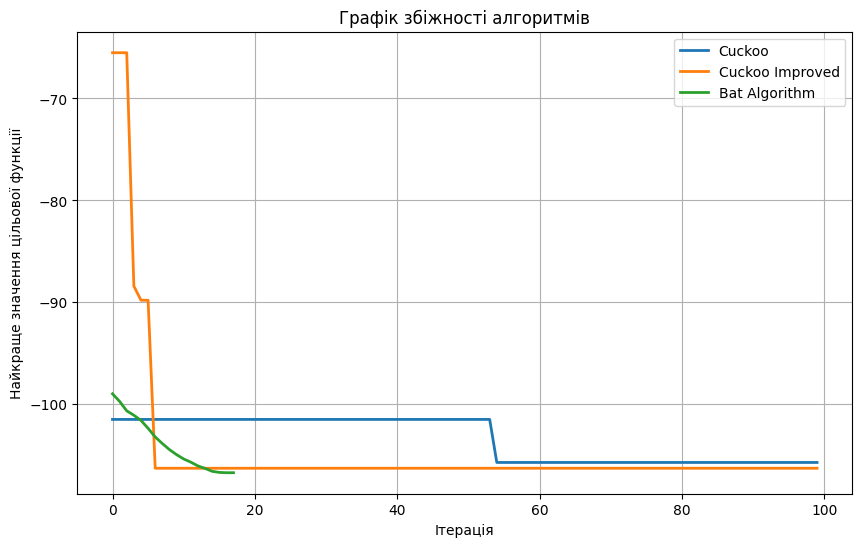

In [68]:
plot_convergence([history1_mishra[:100], history2_mishra[:100], history3_mishra[:100]], ["Cuckoo", "Cuckoo Improved", "Bat Algorithm"])

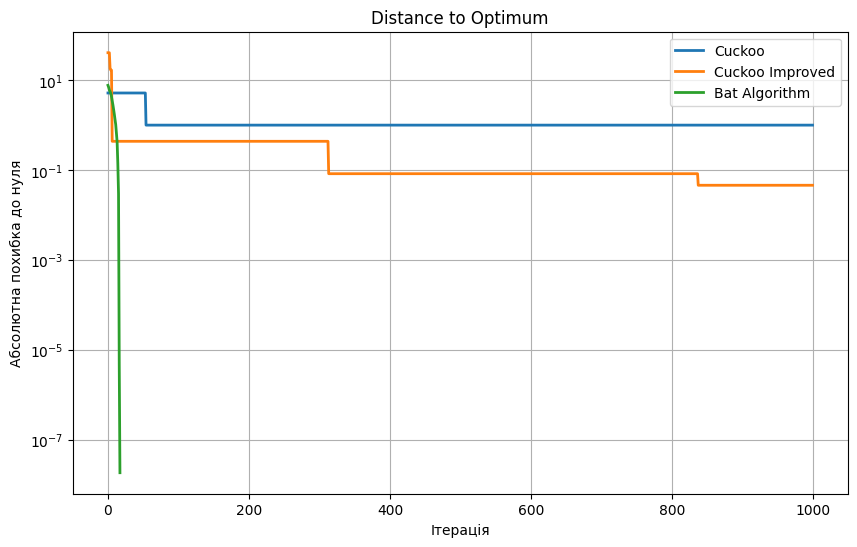

In [69]:
plot_distance_to_optimum([history1_mishra, history2_mishra, history3_mishra], ["Cuckoo", "Cuckoo Improved", "Bat Algorithm"], optimum=-106.7645367)

# 5.1.1

Наведено диференціальне рівняння другого порядку у вигляді системи

$
\begin{cases} 
x'' + y'^2 \cos x' = x^2 t^2, \\
y' = y^4 + x^3 - 3 \sin(tx'), \\
x'(1) = 1, \quad x(3) = 2, \quad y(1) = 1, \quad t \in [1;3].
\end{cases}
$


Щоб спростити систему, введено заміну, це дозволяє спростити рівняння другого порядку до системи рівнянь першого порядку

$x' = z, x'' = z' =>$  
$
\begin{cases} 
x' = z, \\
z' + y'^2 \cos z = x^2 t^2, \\
y' = y^4 + x^3 - 3 \sin(tz) \\
z(1) = 1, \quad x(3) = 2, \quad y(1) = 1, \quad t \in [1;3]
\end{cases}
$

$
\begin{cases} 
x' = z, \\
y' = y^4 + x^3 - 3 \sin(tz) \\
z' = x^2 t^2 - y'^2 \cos z \\
z(1) = 1, \quad x(3) = 2, \quad y(1) = 1, \quad t \in [1;3]
\end{cases}
$

Функціонал у вигляді модуля або квадрата помилки дозволяє формалізувати задачу оптимізації.  
Мінімізація цього функціоналу означає знаходження такого параметра $\lambda$, при якому рішення 
x(3) наближається до цільового значення 2.

$J_1(\alpha) = \left|(x(\alpha, 3) - 2)\right| \rightarrow min$

$J_2(\alpha) = (x(\alpha, 3) - 2) ^2 \rightarrow min$

In [3]:
def adaptive_soft_clip(x, limit=1e10):
    """ Плавне обмеження з динамічною межею """
    if abs(x) <= limit:
        return x
    # print("Adaptive soft clip trigered")
    return limit * np.tanh(x/limit)

def func_511(X, assessment_method):
    # Параметри методу Ейлера
    a, b = 1, 3
    n = 5000
    t = np.linspace(a, b, n)
    h = t[1] - t[0]

    # Ініціалізація масивів
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    
    # Початкові умови
    x[0] = X
    y[0] = 1
    z[0] = 1

    for i in range(n - 1):
        try:
            # Адаптивне обмеження значень
            x[i] = adaptive_soft_clip(x[i])
            y[i] = adaptive_soft_clip(y[i])
            z[i] = adaptive_soft_clip(z[i])

            # Обчислення похідних
            dxdt = z[i]
            dydt = y[i]**4 + x[i]**3 - 3 * np.sin(t[i] * dxdt)
            dzdt = x[i]**2 * t[i]**2 - (dydt)**2 * np.cos(z[i])

            # Адаптивне обмеження похідних
            dydt = adaptive_soft_clip(dydt)
            dzdt = adaptive_soft_clip(dzdt)

            # Оновлення методом Ейлера
            x[i+1] = x[i] + h * dxdt
            y[i+1] = y[i] + h * dydt
            z[i+1] = z[i] + h * dzdt

            # Перевірка на NaN або Inf
            if not np.isfinite(x[i+1]) or not np.isfinite(y[i+1]) or not np.isfinite(z[i+1]):
                print(f"Некоректне значення на кроці {i}: x = {x[i+1]}, y = {y[i+1]}, z = {z[i+1]}")
                return np.inf

        except OverflowError:
            print(f"Переповнення на кроці {i}")
            return np.inf, np.inf

    # Розрахунок цільової функції
    if assessment_method == "square":
        x_square = ((x[-1] - 2)**2)
        return x_square
    elif assessment_method == "abs":
        x_abs = abs(x[-1] - 2)
        return x_abs
    else: 
        raise ValueError("Assessment method should be square or abs.")

In [5]:
cuckoo_511 = Cuckoo(func=lambda X: func_511(X, assessment_method="square"), bounds=[(-2,2)], n_nests=50, max_iter=1000, delta_max=0.9, delta_min=0.1, target=0)
cuckoo__improved_511 = Cuckoo_Improved(func=lambda X: func_511(X, assessment_method="square"), bounds=[(-2,2)], n_nests=50, max_iter=1000, delta_max=0.9, delta_min=0.1, mass_update_fraction=0.1, target=0)
bat_511 = BatAlgorithm(func=lambda X: func_511(X, assessment_method="square"), bounds=[(-2,2)], num_bats=50, max_iter=1000, target=0)
best_position1_511_square, best_value1_511_square, history1_511_square, all_history1_511_square = cuckoo_511.optimize()
best_position2_511_square, best_value2_511_square, history2_511_square, all_history2_511_square = cuckoo__improved_511.optimize()
best_position3_511_square, best_value3_511_square, history3_511_square, all_history3_511_square = bat_511.optimize()
print("\n=== Оптимізація функції 511 ===")
print("Для методу Cucko")
print(f"Найкраще рішення: {best_position1_511_square}")
print(f"Значення функції: {best_value1_511_square}")
print("Для методу Cucko Improved")
print(f"Найкраще рішення: {best_position2_511_square}")
print(f"Значення функції: {best_value2_511_square}")
print("Для методу BatAlgorithm")
print(f"Найкраще рішення: {best_position3_511_square}")
print(f"Значення функції: {best_value3_511_square}")

C:\Users\grund\AppData\Local\Temp\ipykernel_16464\2958932467.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[0] = X


Cuckoo Algorithm: Iteration 100, Best fitness = 0.0029733477262165655
Cuckoo Algorithm: Iteration 200, Best fitness = 0.0029733477262165655
Cuckoo Algorithm: Iteration 300, Best fitness = 0.0029733477262165655
Cuckoo Algorithm: Iteration 400, Best fitness = 0.0029733477262165655
Cuckoo Algorithm: Iteration 500, Best fitness = 0.0029733477262165655
Cuckoo Algorithm: Iteration 600, Best fitness = 0.0029733477262165655
Cuckoo Algorithm: Iteration 700, Best fitness = 0.0029733477262165655
Cuckoo Algorithm: Iteration 800, Best fitness = 0.00025367499960603294
Cuckoo Algorithm: Iteration 900, Best fitness = 0.00025367499960603294
Cuckoo Algorithm: Iteration 1000, Best fitness = 0.00025367499960603294
Cuckoo Improved Algorithm: Iteration 100, Best fitness = 0.0001470629295013243
Cuckoo Improved Algorithm: Iteration 200, Best fitness = 0.00012132220714464768
Cuckoo Improved Algorithm: Iteration 300, Best fitness = 0.00012132220714464768
Cuckoo Improved Algorithm: Iteration 400, Best fitness = 

In [110]:
history1_511_square[0][0][0]

np.float64(-1.4525964924407764)

In [6]:
cuckoo_511 = Cuckoo(func=lambda X: func_511(X, assessment_method="abs"), bounds=[(-2,2)], n_nests=50, max_iter=1000, delta_max=0.9, delta_min=0.1, target=0)
cuckoo__improved_511 = Cuckoo_Improved(func=lambda X: func_511(X, assessment_method="abs"), bounds=[(-2,2)], n_nests=50, max_iter=1000, delta_max=0.9, delta_min=0.1, mass_update_fraction=0.1, target=0)
bat_511 = BatAlgorithm(func=lambda X: func_511(X, assessment_method="abs"), bounds=[(-2,2)], num_bats=50, max_iter=1000, target=0)
best_position1_511_abs, best_value1_511_abs, history1_511_abs, all_history1_511_abs = cuckoo_511.optimize()
best_position2_511_abs, best_value2_511_abs, history2_511_abs, all_history2_511_abs = cuckoo__improved_511.optimize()
best_position3_511_abs, best_value3_511_abs, history3_511_abs, all_history3_511_abs = bat_511.optimize()
print("\n=== Оптимізація функції 511 ===")
print("Для методу Cucko")
print(f"Найкраще рішення: {best_position1_511_abs}")
print(f"Значення функції: {best_value1_511_abs}")
print("Для методу Cucko Improved")
print(f"Найкраще рішення: {best_position2_511_abs}")
print(f"Значення функції: {best_value2_511_abs}")
print("Для методу BatAlgorithm")
print(f"Найкраще рішення: {best_position3_511_abs}")
print(f"Значення функції: {best_value3_511_abs}")

C:\Users\grund\AppData\Local\Temp\ipykernel_16464\2958932467.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[0] = X


Cuckoo Algorithm: Iteration 100, Best fitness = 0.047245246854541456
Cuckoo Algorithm: Iteration 200, Best fitness = 0.047245246854541456
Cuckoo Algorithm: Iteration 300, Best fitness = 0.047245246854541456
Cuckoo Algorithm: Iteration 400, Best fitness = 0.047245246854541456
Cuckoo Algorithm: Iteration 500, Best fitness = 0.047245246854541456
Cuckoo Algorithm: Iteration 600, Best fitness = 0.047245246854541456
Cuckoo Algorithm: Iteration 700, Best fitness = 0.026193524822711423
Cuckoo Algorithm: Iteration 800, Best fitness = 0.0005399391336577963
Cuckoo Algorithm: Iteration 900, Best fitness = 0.0005399391336577963
Cuckoo Algorithm: Iteration 1000, Best fitness = 0.0005399391336577963
Cuckoo Improved Algorithm: Iteration 100, Best fitness = 0.04813365639962219
Cuckoo Improved Algorithm: Iteration 200, Best fitness = 0.024393139147506737
Cuckoo Improved Algorithm: Iteration 300, Best fitness = 0.024393139147506737
Cuckoo Improved Algorithm: Iteration 400, Best fitness = 0.00856937533720

In [18]:
def plot_511(assessment_method):
    # Параметри методу Ейлера
    a, b = 1, 3
    n = 5000
    t = np.linspace(a, b, n)
    h = t[1] - t[0]
    al = np.arange(-3, 3, 0.005)

    # Ініціалізація масивів
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    f = np.zeros_like(al)

    # Початкові умови
    y[0] = 1
    z[0] = 1
    for l in range(len(al)):
        x[0] = al[l]
        for i in range(n - 1):
            try:
                # Адаптивне обмеження значень
                x[i] = adaptive_soft_clip(x[i])
                y[i] = adaptive_soft_clip(y[i])
                z[i] = adaptive_soft_clip(z[i])

                # Обчислення похідних
                dxdt = z[i]
                dydt = y[i]**4 + x[i]**3 - 3 * np.sin(t[i] * dxdt)
                dzdt = x[i]**2 * t[i]**2 - (dydt)**2 * np.cos(z[i])

                # Адаптивне обмеження похідних
                dydt = adaptive_soft_clip(dydt)
                dzdt = adaptive_soft_clip(dzdt)

                # Оновлення методом Ейлера
                x[i+1] = x[i] + h * dxdt
                y[i+1] = y[i] + h * dydt
                z[i+1] = z[i] + h * dzdt

                # Перевірка на NaN або Inf
                if not np.isfinite(x[i+1]) or not np.isfinite(y[i+1]) or not np.isfinite(z[i+1]):
                    print(f"Некоректне значення на кроці {i}: x = {x[i+1]}, y = {y[i+1]}, z = {z[i+1]}")
                    return np.inf

            except OverflowError:
                print(f"Переповнення на кроці {i}")
                return np.inf
            
        if assessment_method == "square":
            f[l] = ((x[-1] - 2)**2)
        elif assessment_method == "abs":
            f[l] = abs(x[-1] - 2)
        else: 
            raise ValueError("Assessment method should be square or abs.")
    plt.plot(al, f)
    plt.yscale('log')
    plt.grid()
    plt.show()
    return al, f

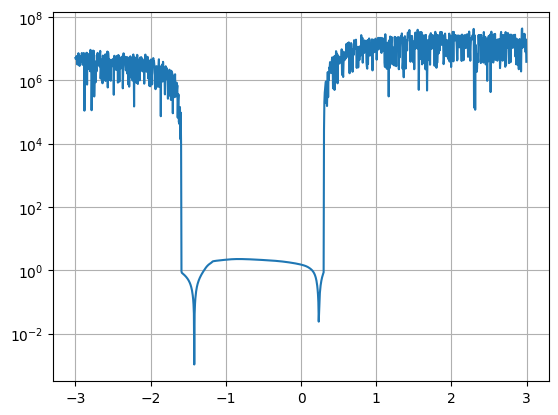

In [19]:
al_abs, f_abs = plot_511("abs")

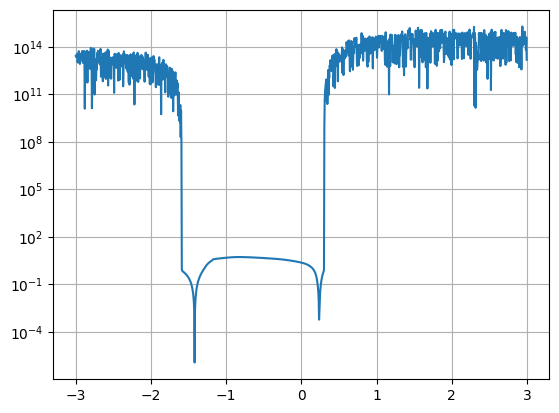

In [20]:
al_square, f_square = plot_511("square")

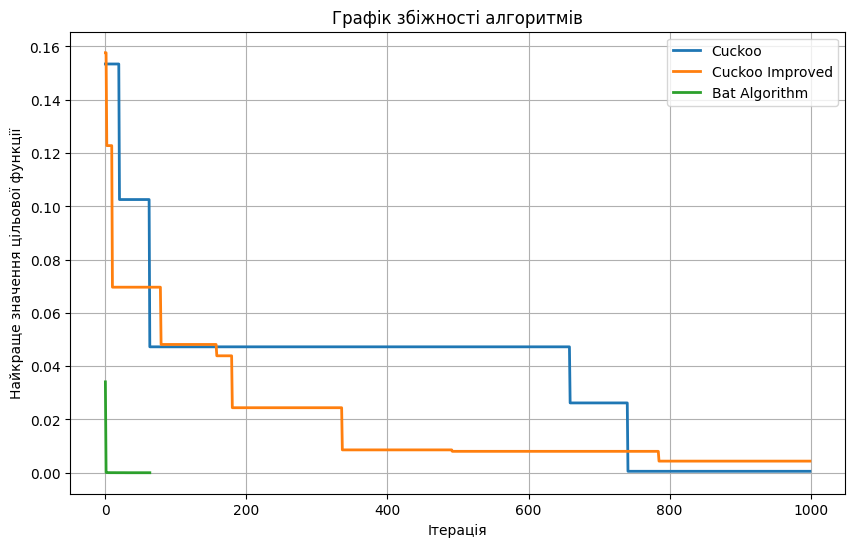

In [26]:
plot_convergence([history1_511_abs, history2_511_abs, history3_511_abs], ["Cuckoo", "Cuckoo Improved", "Bat Algorithm"])

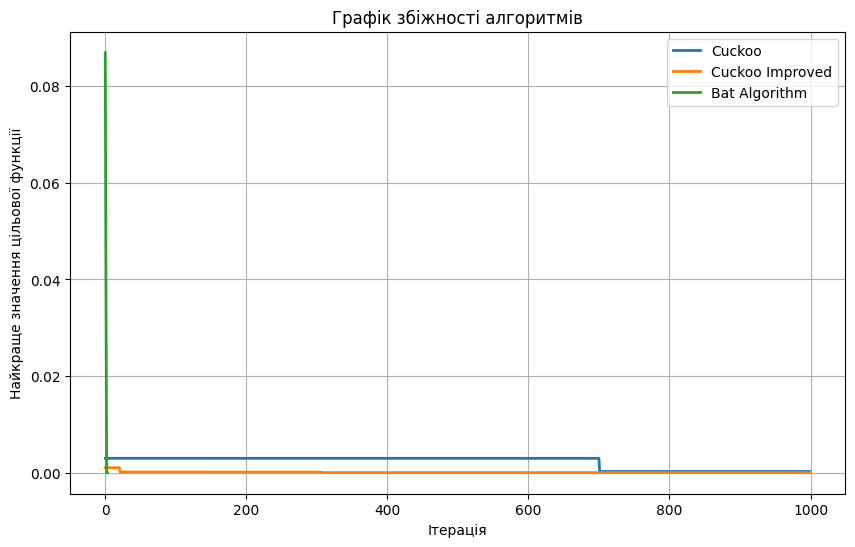

In [27]:
plot_convergence([history1_511_square, history2_511_square, history3_511_square], ["Cuckoo", "Cuckoo Improved", "Bat Algorithm"])

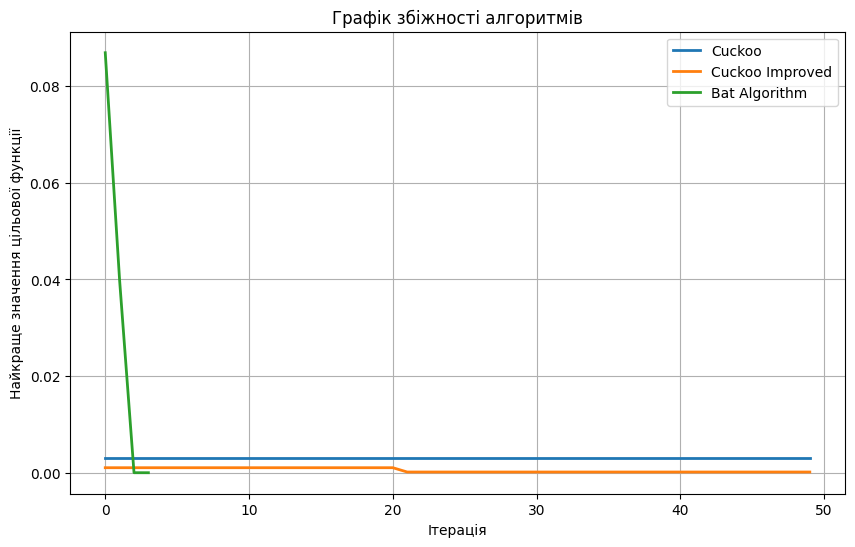

In [29]:
plot_convergence([history1_511_square[:50], history2_511_square[:50], history3_511_square[:50]], ["Cuckoo", "Cuckoo Improved", "Bat Algorithm"])

In [ ]:
def create_gif(title, al, f, history, all_history, filename):
    # Налаштування фігури
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.yscale('log')

    def update(frame):
        ax.clear()
        ax.plot(al, f, label=f"{title}")
        plt.yscale('log')
        # Відображення всіх особин (чорні точки)
        population = np.array([ind[0][0] for ind in all_history[frame]])
        fitness = np.array([ind[1] for ind in all_history[frame]])
        ax.scatter(population, fitness, c="black", label="Популяція")

        # Відображення найкращого рішення (червона точка)
        ax.scatter(history[frame][0][0], history[frame][1], c="r", label=f"Найкращий: {history[frame][1]:.4f}")

        ax.legend()
        ax.set_title(title)
        ax.set_xlabel(r"$\alpha$")
        ax.set_ylabel(r"$J(\alpha)$")
        ax.grid()

    # Створення анімації
    ani = FuncAnimation(fig, update, frames=len(history), interval=50)

    # Збереження у форматі GIF
    ani.save(filename, dpi=80, writer=PillowWriter(fps=20))
    plt.close(fig)
    print(f"GIF '{filename}' успішно збережено!")

In [22]:
# Абсолютна похибка
create_gif("Cuckoo (Abs)", al_abs, f_abs, history1_511_abs, all_history1_511_abs, "cuckoo_abs_511.gif")
create_gif("Cuckoo Improved (Abs)", al_abs, f_abs, history2_511_abs, all_history2_511_abs, "cuckoo_improved_abs_511.gif")
create_gif("Bat (Abs)", al_abs, f_abs, history3_511_abs, all_history3_511_abs, "bat_abs_511.gif")

# Квадрат похибки
create_gif("Cuckoo (Square)", al_square, f_square, history1_511_square, all_history1_511_square, "cuckoo_square_511.gif")
create_gif("Cuckoo Improved (Square)", al_square, f_square, history2_511_square, all_history2_511_square, "cuckoo_improved_square_511.gif")
create_gif("Bat (Square)", al_square, f_square, history3_511_square, all_history3_511_square, "bat_square_511.gif")

GIF 'cuckoo_abs_511.gif' успішно збережено!
GIF 'cuckoo_improved_abs_511.gif' успішно збережено!
GIF 'bat_abs_511.gif' успішно збережено!
GIF 'cuckoo_square_511.gif' успішно збережено!
GIF 'cuckoo_improved_square_511.gif' успішно збережено!
GIF 'bat_square_511.gif' успішно збережено!


# 5.2.1

$
\begin{cases} 
x'' + \frac{\sin(y + tx)}{(x^2 + y')^2 + 1} - \cos(xy) = 0, \\
y'' - \frac{y'}{t^2} + \cos(3x - y') - \frac{x^2}{t^4} = 6t - \frac{1}{t^4} + \cos(5) - 4, \\
x(1) = 2, \quad y(1) = -1, \quad x(3) = 10, \quad y(3) = 21, \quad t \in [1;3].
\end{cases}
$

$x' = z, x'' = z'$  
$y' = w, y'' = w'$  
$
\begin{cases} 
x' = z \\
y' = w \\
z' + \frac{\sin(y + tx)}{(x^2 + y')^2 + 1} - \cos(xy) = 0, \\
w' - \frac{y'}{t^2} + \cos(3x - y') - \frac{x^2}{t^4} = 6t - \frac{1}{t^4} + \cos(5) - 4, \\
x(1) = 2, \quad y(1) = -1, \quad x(3) = 10, \quad y(3) = 21, \quad t \in [1;3].
\end{cases}
$

$
\begin{cases} 
x' = z, \\
y' = w, \\
z' = - \frac{\sin(y + tx)}{(x^2 + y')^2 + 1} + \cos(xy), \\
w' = 6t - \frac{1}{t^4} + \cos(5) - 4 + \frac{y'}{t^2} - \cos(3x - y') + \frac{x^2}{t^4}, \\
x(1) = 2, \quad y(1) = -1, \quad x(3) = 10, \quad y(3) = 21, \quad t \in [1;3].
\end{cases}
$

In [39]:
def func_521(X, assessment_method):
    # Параметри методу Ейлера
    a, b = 1, 3
    n = 1000
    t = np.linspace(a, b, n)
    h = t[1] - t[0]

    # Ініціалізація масивів
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    w = np.zeros(n)

    # Початкові умови
    x[0] = 2
    y[0] = -1
    z[0] = X[0]
    w[0] = X[1]

    for i in range(n - 1):
        try:
            # Обчислення похідних
            dxdt = z[i]
            dydt = w[i]
            dzdt = - (np.sin(y[i] + t[i] * x[i]))/((x[i]**2 + dydt)**2 + 1) + np.cos(x[i] * y[i]) 
            dwdt = 6*t[i] - 1/t[i]**4 + np.cos(5) - 4 + dydt/t[i]**2 - np.cos(3*x[i]-dydt) + x[i]**2/t[i]**4


            # Оновлення методом Ейлера
            x[i+1] = x[i] + h * dxdt
            y[i+1] = y[i] + h * dydt
            z[i+1] = z[i] + h * dzdt
            w[i+1] = w[i] + h * dwdt

            # Перевірка на NaN або Inf
            if not np.isfinite(x[i+1]) or not np.isfinite(y[i+1]) or not np.isfinite(z[i+1]):
                print(f"Некоректне значення на кроці {i}: x = {x[i+1]}, y = {y[i+1]}, z = {z[i+1]}")
                return np.inf

        except OverflowError:
            print(f"Переповнення на кроці {i}")
            return np.inf, np.inf
        
    # Розрахунок цільової функції
    if assessment_method == "square":
        xy_square = ((x[-1] - 10)**2) + ((y[-1] - 21)**2)
        return xy_square
    elif assessment_method == "abs":
        xy_abs = np.abs(x[-1] - 10) + np.abs(y[-1] - 21)
        return xy_abs
    elif assessment_method == "maxabs":
        xy_maxabs = max(np.abs(x[-1] - 10), np.abs(y[-1] - 21))
        return xy_maxabs
    else: 
        raise ValueError("Assessment method should be square or abs or maxabs.")

In [40]:
def plot_521(assessment_method):
    # Параметри методу Ейлера
    a, b = 1, 3
    n = 1000
    t = np.linspace(a, b, n)
    h = t[1] - t[0]

    # Ініціалізація масивів
    x = np.zeros(n)
    y = np.zeros(n)
    z = np.zeros(n)
    w = np.zeros(n)
    
    al1 = np.arange(-8, 8, 0.2)
    al2 = np.arange(-8, 8, 0.2)

    f = np.zeros((al1.shape[0], al2.shape[0]))

    # Початкові умови
    x[0] = 2
    y[0] = -1

    for l1 in range(len(al1)):
        for l2 in range(len(al2)):
            z[0] = al1[l1]  
            w[0] = al2[l2]
            for i in range(n - 1):
                try:
                    # Обчислення похідних
                    dxdt = z[i]
                    dydt = w[i]
                    dzdt = - (np.sin(y[i] + t[i] * x[i]))/((x[i]**2 + dydt)**2 + 1) + np.cos(x[i] * y[i]) 
                    dwdt = 6*t[i] - 1/t[i]**4 + np.cos(5) - 4 + dydt/t[i]**2 - np.cos(3*x[i]-dydt) + x[i]**2/t[i]**4


                    # Оновлення методом Ейлера
                    x[i+1] = x[i] + h * dxdt
                    y[i+1] = y[i] + h * dydt
                    z[i+1] = z[i] + h * dzdt
                    w[i+1] = w[i] + h * dwdt

                    # Перевірка на NaN або Inf
                    if not np.isfinite(x[i+1]) or not np.isfinite(y[i+1]) or not np.isfinite(z[i+1]):
                        print(f"Некоректне значення на кроці {i}: x = {x[i+1]}, y = {y[i+1]}, z = {z[i+1]}")
                        return np.inf, np.inf

                except OverflowError:
                    print(f"Переповнення на кроці {i}")
                    return np.inf, np.inf
                
            if assessment_method == "square":
                f[l1, l2] = ((x[-1] - 10)**2) + ((y[-1] - 21)**2)
            elif assessment_method == "abs":
                f[l1, l2] = np.abs(x[-1] - 10) + np.abs(y[-1] - 21)
            elif assessment_method == "maxabs": 
                f[l1, l2] = max(np.abs(x[-1] - 10), np.abs(y[-1] - 21))
            else: 
                raise ValueError("Assessment method should be square or abs.")
            
    X, Y = np.meshgrid(al1, al2)
    contour = plt.contourf(X, Y, f.T, levels=50, cmap='viridis')
    plt.colorbar(contour, label="Оцінка")

    # Налаштування графіка
    plt.title(assessment_method)
    plt.xlabel("Alpha 1")
    plt.ylabel("Alpha 2")
    plt.grid(True)

    plt.show()
            
    return al1, al2, f

Поверхності функцій які мінімзуємо:

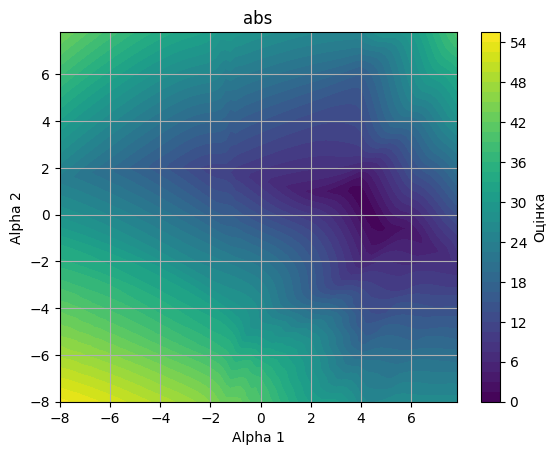

In [41]:
al_1_abs, al_2_abs, f_abs = plot_521("abs")

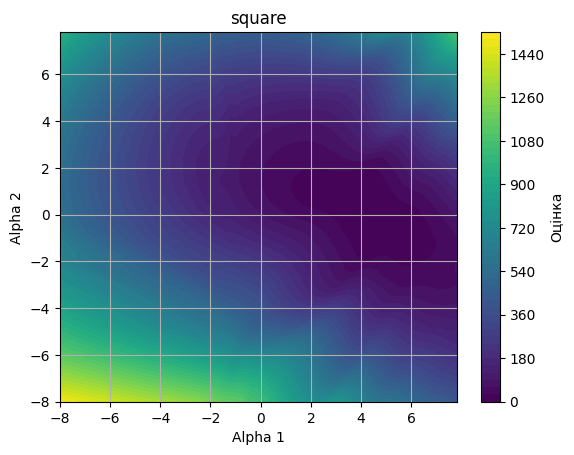

In [42]:
al_1_square, al_2_square, f_square = plot_521("square")

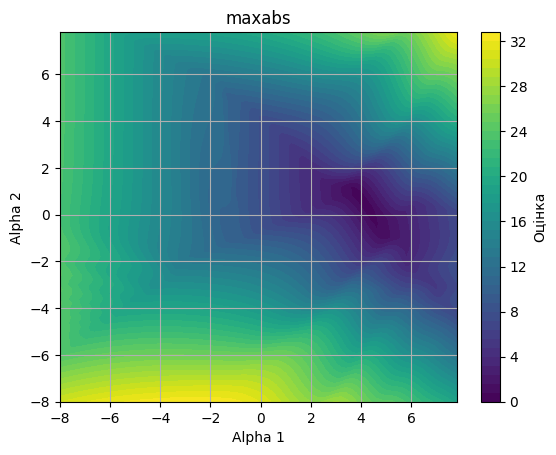

In [43]:
al_1_maxabs, al_2_maxabs, f_maxabs = plot_521("maxabs")

In [57]:
def create_contour_gif(title, al1, al2, f, history, all_history, filename):
    # Налаштування фігури
    fig, ax = plt.subplots(figsize=(8, 6))

    # Створення сітки для контурного графіка
    X, Y = np.meshgrid(al1, al2)

    # Контурний графік (створюється один раз)
    contour = ax.contourf(X, Y, f.T, levels=50, cmap='viridis')
    cbar = plt.colorbar(contour, ax=ax, label="Оцінка")

    # Ініціалізація точок популяції (чорні) та найкращого (червона)
    population_scatter = ax.scatter([], [], c="black", label="Популяція")
    best_scatter = ax.scatter([], [], c="r", s=100, label="Найкращий")
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("Alpha 1")
    ax.set_ylabel("Alpha 2")
    ax.grid()

    def update(frame):
        # Оновлення точок популяції
        population_x = np.array([ind[0][0] for ind in all_history[frame]])
        population_y = np.array([ind[0][1] for ind in all_history[frame]])
        population_scatter.set_offsets(np.c_[population_x, population_y])

        # Оновлення найкращого рішення
        best_x, best_y = history[frame][0][0], history[frame][0][1]
        best_scatter.set_offsets([best_x, best_y])

        ax.set_title(f"{title} - Крок {frame+1}/{len(history)}")

    # Створення анімації
    ani = FuncAnimation(fig, update, frames=len(history), interval=50)

    # Збереження у форматі GIF
    ani.save(filename, dpi=80, writer=PillowWriter(fps=20))
    plt.close(fig)
    print(f"GIF '{filename}' успішно збережено!")

In [46]:
cuckoo_521 = Cuckoo(func=lambda X: func_521(X, assessment_method="square"), bounds=[(-8, 8), (-8, 8)], n_nests=50, max_iter=1000, delta_max=0.9, delta_min=0.1, target=0)
cuckoo__improved_521 = Cuckoo_Improved(func=lambda X: func_521(X, assessment_method="square"), bounds=[(-8, 8), (-8, 8)], n_nests=50, max_iter=1000, delta_max=0.9, delta_min=0.1, mass_update_fraction=0.1, target=0)
bat_521 = BatAlgorithm(func=lambda X: func_521(X, assessment_method="square"), bounds=[(-8, 8), (-8, 8)], num_bats=50, max_iter=1000, target=0)
best_position1_521_square, best_value1_521_square, history1_521_square, all_history1_521_square = cuckoo_521.optimize()
best_position2_521_square, best_value2_521_square, history2_521_square, all_history2_521_square = cuckoo__improved_521.optimize()
best_position3_521_square, best_value3_521_square, history3_521_square, all_history3_521_square = bat_521.optimize()
print("\n=== Оптимізація функції 521 ===")
print("Для методу Cucko")
print(f"Найкраще рішення: {best_position1_521_square}")
print(f"Значення функції: {best_value1_521_square}")
print("Для методу Cucko Improved")
print(f"Найкраще рішення: {best_position2_521_square}")
print(f"Значення функції: {best_value2_521_square}")
print("Для методу BatAlgorithm")
print(f"Найкраще рішення: {best_position3_521_square}")
print(f"Значення функції: {best_value3_521_square}")

Cuckoo Algorithm: Iteration 100, Best fitness = 12.548415786151285
Cuckoo Algorithm: Iteration 200, Best fitness = 12.548415786151285
Cuckoo Algorithm: Iteration 300, Best fitness = 11.442146311015977
Cuckoo Algorithm: Iteration 400, Best fitness = 1.9820292832595676
Cuckoo Algorithm: Iteration 500, Best fitness = 1.867471733493014
Cuckoo Algorithm: Iteration 600, Best fitness = 1.867471733493014
Cuckoo Algorithm: Iteration 700, Best fitness = 0.4939482198575721
Cuckoo Algorithm: Iteration 800, Best fitness = 0.4939482198575721
Cuckoo Algorithm: Iteration 900, Best fitness = 0.3690642386755363
Cuckoo Algorithm: Iteration 1000, Best fitness = 0.3200915817317413
Cuckoo Improved Algorithm: Iteration 100, Best fitness = 0.23998804338461358
Cuckoo Improved Algorithm: Iteration 200, Best fitness = 0.01931191834809601
Cuckoo Improved Algorithm: Iteration 300, Best fitness = 0.01931191834809601
Cuckoo Improved Algorithm: Iteration 400, Best fitness = 0.01931191834809601
Cuckoo Improved Algorit

In [50]:
cuckoo_521 = Cuckoo(func=lambda X: func_521(X, assessment_method="abs"), bounds=[(-8, 8), (-8, 8)], n_nests=50, max_iter=1000, delta_max=0.9, delta_min=0.1, target=0)
cuckoo__improved_521 = Cuckoo_Improved(func=lambda X: func_521(X, assessment_method="abs"), bounds=[(-8, 8), (-8, 8)], n_nests=50, max_iter=1000, delta_max=0.9, delta_min=0.1, mass_update_fraction=0.1, target=0)
bat_521 = BatAlgorithm(func=lambda X: func_521(X, assessment_method="abs"), bounds=[(-8, 8), (-8, 8)], num_bats=50, max_iter=500, target=0)
best_position1_521_abs, best_value1_521_abs, history1_521_abs, all_history1_521_abs = cuckoo_521.optimize()
best_position2_521_abs, best_value2_521_abs, history2_521_abs, all_history2_521_abs = cuckoo__improved_521.optimize()
best_position3_521_abs, best_value3_521_abs, history3_521_abs, all_history3_521_abs = bat_521.optimize()
print("\n=== Оптимізація функції 521 ===")
print("Для методу Cucko")
print(f"Найкраще рішення: {best_position1_521_abs}")
print(f"Значення функції: {best_value1_521_abs}")
print("Для методу Cucko Improved")
print(f"Найкраще рішення: {best_position2_521_abs}")
print(f"Значення функції: {best_value2_521_abs}")
print("Для методу BatAlgorithm")
print(f"Найкраще рішення: {best_position3_521_abs}")
print(f"Значення функції: {best_value3_521_abs}")

Cuckoo Algorithm: Iteration 100, Best fitness = 2.3725336901936913
Cuckoo Algorithm: Iteration 200, Best fitness = 0.7039848855896427
Cuckoo Algorithm: Iteration 300, Best fitness = 0.7039848855896427
Cuckoo Algorithm: Iteration 400, Best fitness = 0.7039848855896427
Cuckoo Algorithm: Iteration 500, Best fitness = 0.7039848855896427
Cuckoo Algorithm: Iteration 600, Best fitness = 0.7039848855896427
Cuckoo Algorithm: Iteration 700, Best fitness = 0.7039848855896427
Cuckoo Algorithm: Iteration 800, Best fitness = 0.7039848855896427
Cuckoo Algorithm: Iteration 900, Best fitness = 0.5262315395351713
Cuckoo Algorithm: Iteration 1000, Best fitness = 0.35477454735427116
Cuckoo Improved Algorithm: Iteration 100, Best fitness = 0.10910919596842739
Cuckoo Improved Algorithm: Iteration 200, Best fitness = 0.10910919596842739
Cuckoo Improved Algorithm: Iteration 300, Best fitness = 0.10910919596842739
Cuckoo Improved Algorithm: Iteration 400, Best fitness = 0.10910919596842739
Cuckoo Improved Algo

In [51]:
cuckoo_521 = Cuckoo(func=lambda X: func_521(X, assessment_method="maxabs"), bounds=[(-8, 8), (-8, 8)], n_nests=50, max_iter=1000, delta_max=0.9, delta_min=0.1, target=0)
cuckoo__improved_521 = Cuckoo_Improved(func=lambda X: func_521(X, assessment_method="maxabs"), bounds=[(-8, 8), (-8, 8)], n_nests=50, max_iter=1000, delta_max=0.9, delta_min=0.1, mass_update_fraction=0.1, target=0)
bat_521 = BatAlgorithm(func=lambda X: func_521(X, assessment_method="maxabs"), bounds=[(-8, 8), (-8, 8)], num_bats=50, max_iter=500, target=0)
best_position1_521_maxabs, best_value1_521_maxabs, history1_521_maxabs, all_history1_521_maxabs = cuckoo_521.optimize()
best_position2_521_maxabs, best_value2_521_maxabs, history2_521_maxabs, all_history2_521_maxabs = cuckoo__improved_521.optimize()
best_position3_521_maxabs, best_value3_521_maxabs, history3_521_maxabs, all_history3_521_maxabs = bat_521.optimize()
print("\n=== Оптимізація функції 521 ===")
print("Для методу Cucko")
print(f"Найкраще рішення: {best_position1_521_maxabs}")
print(f"Значення функції: {best_value1_521_maxabs}")
print("Для методу Cucko Improved")
print(f"Найкраще рішення: {best_position2_521_maxabs}")
print(f"Значення функції: {best_value2_521_maxabs}")
print("Для методу BatAlgorithm")
print(f"Найкраще рішення: {best_position3_521_maxabs}")
print(f"Значення функції: {best_value3_521_maxabs}")

Cuckoo Algorithm: Iteration 100, Best fitness = 2.4633057587098577
Cuckoo Algorithm: Iteration 200, Best fitness = 1.3421601163196275
Cuckoo Algorithm: Iteration 300, Best fitness = 0.21356074332381425
Cuckoo Algorithm: Iteration 400, Best fitness = 0.21356074332381425
Cuckoo Algorithm: Iteration 500, Best fitness = 0.21356074332381425
Cuckoo Algorithm: Iteration 600, Best fitness = 0.21356074332381425
Cuckoo Algorithm: Iteration 700, Best fitness = 0.21356074332381425
Cuckoo Algorithm: Iteration 800, Best fitness = 0.21356074332381425
Cuckoo Algorithm: Iteration 900, Best fitness = 0.21356074332381425
Cuckoo Algorithm: Iteration 1000, Best fitness = 0.21356074332381425
Cuckoo Improved Algorithm: Iteration 100, Best fitness = 0.1357319241239736
Cuckoo Improved Algorithm: Iteration 200, Best fitness = 0.128393762085798
Cuckoo Improved Algorithm: Iteration 300, Best fitness = 0.128393762085798
Cuckoo Improved Algorithm: Iteration 400, Best fitness = 0.128393762085798
Cuckoo Improved Algo

Графіки збіжності

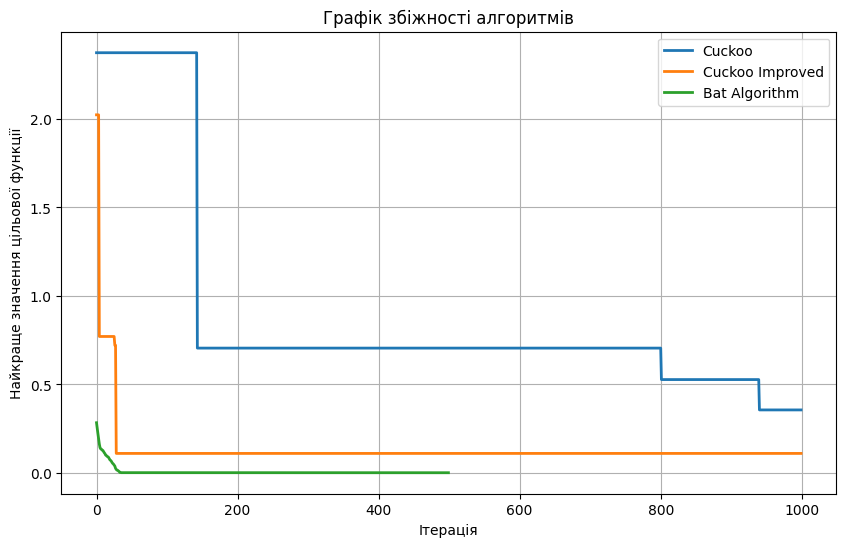

In [52]:
plot_convergence([history1_521_abs, history2_521_abs, history3_521_abs], ["Cuckoo", "Cuckoo Improved", "Bat Algorithm"])

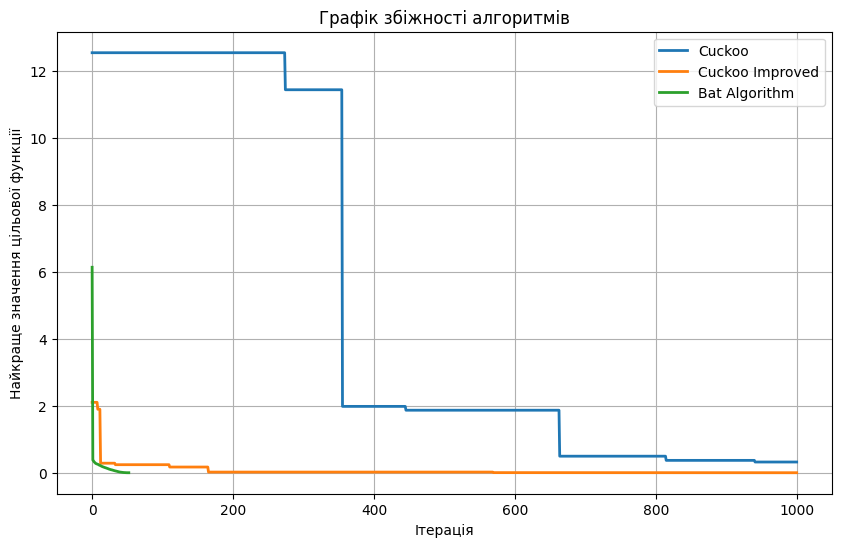

In [53]:
plot_convergence([history1_521_square, history2_521_square, history3_521_square], ["Cuckoo", "Cuckoo Improved", "Bat Algorithm"])

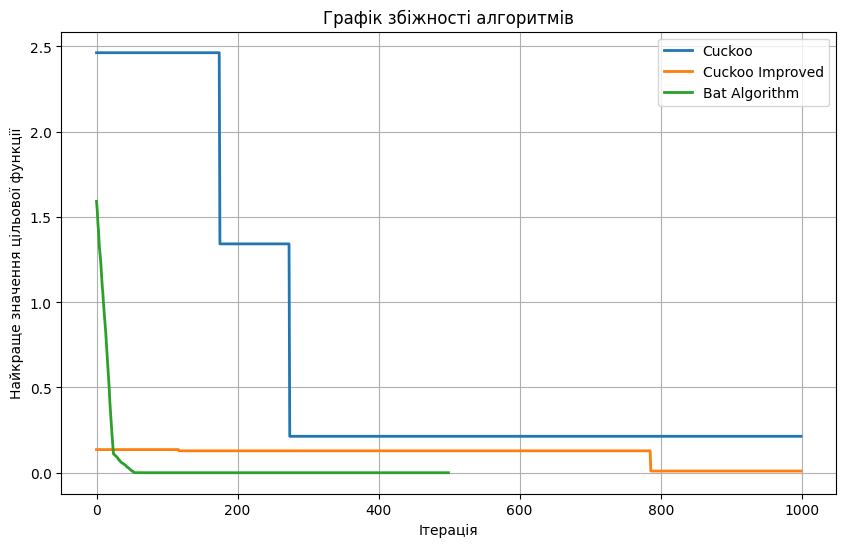

In [54]:
plot_convergence([history1_521_maxabs, history2_521_maxabs, history3_521_maxabs], ["Cuckoo", "Cuckoo Improved", "Bat Algorithm"])

In [59]:
create_contour_gif(title = "Bat (Abs)", al1 = al_1_abs, al2 = al_2_abs, f = f_abs, history = history3_521_abs, all_history = all_history3_521_abs, filename = "contour_bat_521_abs.gif")
create_contour_gif(title = "Bat (square)", al1 = al_1_square, al2 = al_2_square, f = f_square, history = history3_521_square, all_history = all_history3_521_square, filename = "contour_bat_521_square.gif") 
create_contour_gif(title = "Bat (maxabs)", al1 = al_1_maxabs, al2 = al_2_maxabs, f = f_maxabs, history = history3_521_maxabs, all_history = all_history3_521_maxabs, filename = "contour_bat_521_maxabs.gif")

GIF 'contour_bat_521_abs.gif' успішно збережено!
GIF 'contour_bat_521_square.gif' успішно збережено!
GIF 'contour_bat_521_maxabs.gif' успішно збережено!
